In [41]:

import pandas as pd
import csv

import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
colnames=['price', 'year_model', 'mileage', 'fuel_type', 'mark', 'model', 'fiscal_power', 'sector', 'type', 'city'] 
df = pd.read_csv("./data/output.csv", sep=",", names=colnames, header=None)
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135 000 DH,Année-Modèle:2013,Kilométrage:160 000 - 169 999,Type de carburant:Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53 000 DH,Année-Modèle:2008,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59 000 DH,Année-Modèle:2007,Kilométrage:180 000 - 189 999,Type de carburant:Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88 000 DH,Année-Modèle:2010,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60 000 DH,Année-Modèle:2009,Kilométrage:130 000 - 139 999,Type de carburant:Petrol,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [43]:
df = df[df.price.str.contains("DH") == True]

df.price = df.price.map(lambda x: x.rstrip('DH'))

df.price = df.price.str.replace(" ","")
df.price = pd.to_numeric(df.price, errors = 'coerce', downcast= 'integer')
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135000,Année-Modèle:2013,Kilométrage:160 000 - 169 999,Type de carburant:Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53000,Année-Modèle:2008,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59000,Année-Modèle:2007,Kilométrage:180 000 - 189 999,Type de carburant:Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88000,Année-Modèle:2010,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60000,Année-Modèle:2009,Kilométrage:130 000 - 139 999,Type de carburant:Petrol,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


In [44]:
df = df[df.year_model.str.contains("Année-Modèle") == True]
df.year_model = df.year_model.map(lambda x: x.lstrip('Année-Modèle:').rstrip('ou plus ancien'))

df = df[df.year_model != ' -']
df = df[df.year_model != '']
df.year_model = pd.to_numeric(df.year_model, errors = 'coerce', downcast = 'integer')


In [45]:
df = df[df.mileage.str.contains("Kilométrage") == True]
df.mileage = df.mileage.map(lambda x: x.lstrip('Kilométrage:'))
df.mileage = df.mileage.map(lambda x: x.lstrip('Plus de '))

df = df[df.mileage != '-']

if any(df.mileage != '500 000'):
    
    df['minim'], df['maxim'] = df.mileage.str.split('-', 1).str
     
    df['maxim'] = df.maxim.str.replace(" ","")
    df['minim'] = df.minim.str.replace(" ","")
    df['maxim'] = df['maxim'].replace(np.nan, 500000)
     
    df.mileage = df.apply(lambda row: (int(row.minim) + int(row.maxim)) / 2, axis=1)
    
    df = df.drop(columns=['minim', 'maxim'])
    

In [46]:
df.fuel_type = df.fuel_type.map(lambda x: x.lstrip('Type de carburant:'))
df = df[df.fuel_type != '-']

array(['Diesel', 'Petrol', 'Electrique', 'LPG'], dtype=object)

In [47]:
df['mark'] = df['mark'].map(lambda x: x.replace('Marque:', ''))
df = df[df.mark != '-']
df['model'] = df['model'].map(lambda x: x.replace('Modèle:', ''))

In [48]:
df.fiscal_power.value_counts()
df.fiscal_power = df.fiscal_power.map(lambda x: x.lstrip('Puissance fiscale:Plus de').rstrip(' CV'))
df.fiscal_power = df.fiscal_power.str.replace("-","0")
df.fiscal_power = pd.to_numeric(df.fiscal_power, errors = 'coerce', downcast= 'integer')

df.fiscal_power = df.fiscal_power.map( lambda x : df.fiscal_power.mean() if x == 0 else x )

In [49]:
df = df.drop(columns=['sector', 'type'])

In [50]:
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,city
0,135000,2013,164999.5,Diesel,Peugeot,508,2.630656,Temara
1,53000,2008,37499.5,Diesel,Renault,Clio,2.630656,Safi
2,59000,2007,184999.5,Diesel,Citroen,C3,6.000000,Fès
3,88000,2010,37499.5,Diesel,Mercedes-Benz,220,2.630656,Nador
4,60000,2009,134999.5,Petrol,Ford,Fiesta,7.000000,Fès


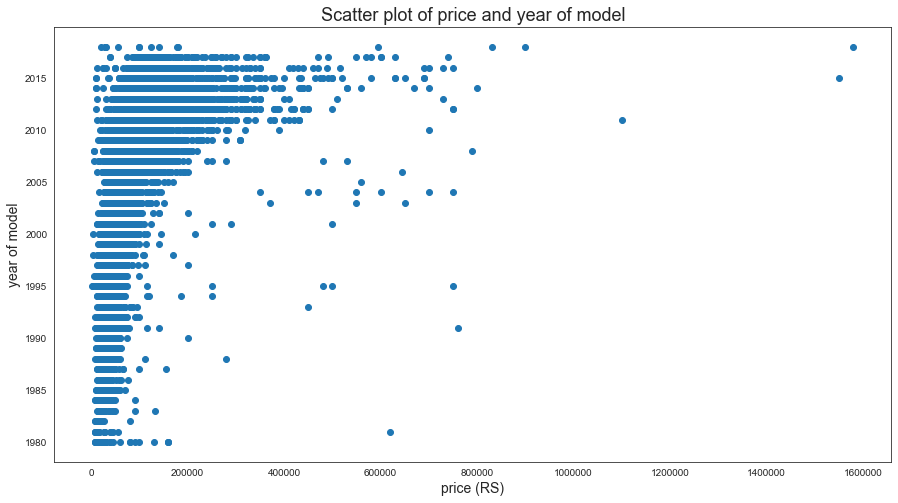

In [51]:
plt.figure(figsize=(15, 8))
plt.scatter(df.price, df.year_model)
plt.xlabel("price (RS)", fontsize=14)
plt.ylabel("year of model", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

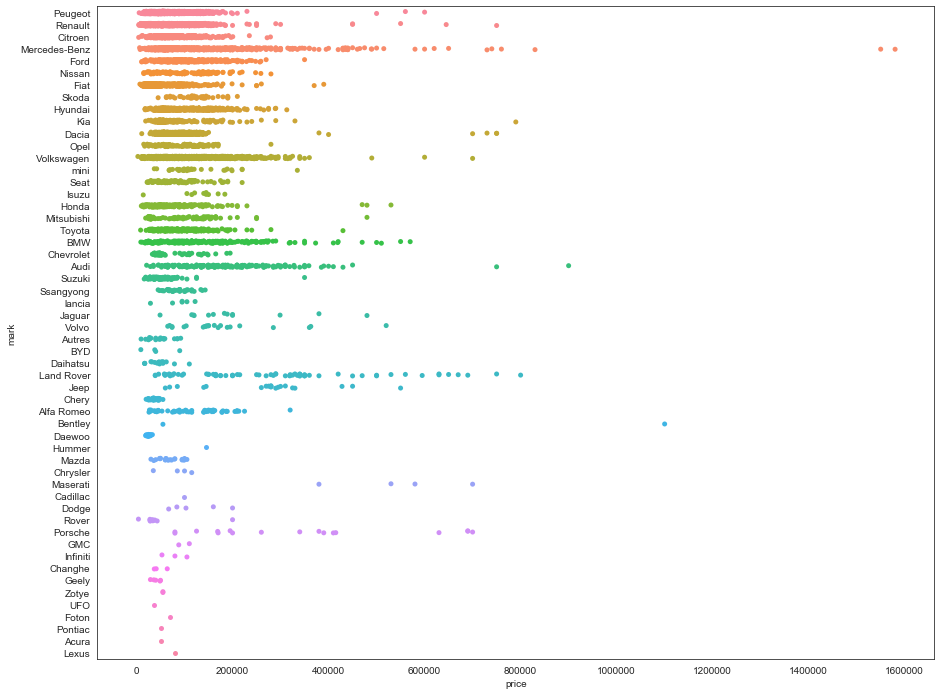

In [52]:
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = df, x='price', y='mark', jitter=.1)
plt.show()

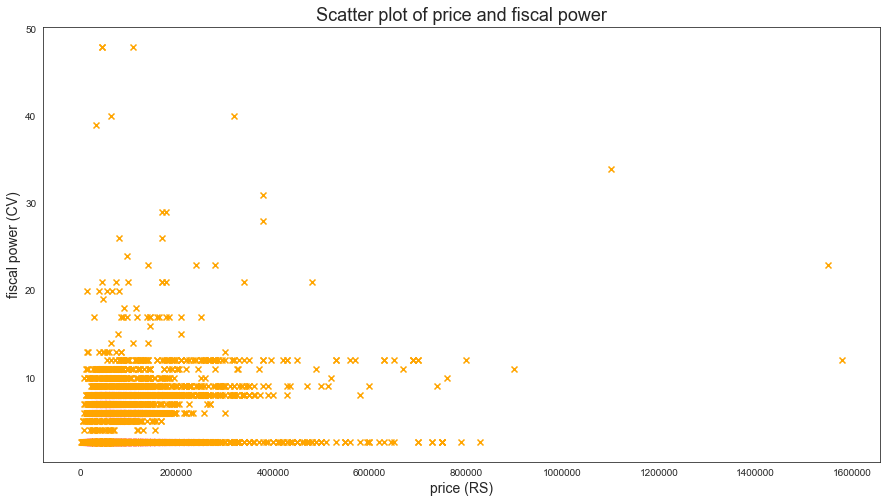

In [54]:
plt.figure(figsize=(15, 8))
plt.scatter(df.price, df.fiscal_power, c='orange', marker='x')
plt.xlabel("price (RS)", fontsize=14)
plt.ylabel("fiscal power (CV)", fontsize=14)
plt.title("Scatter plot of price and fiscal power",fontsize=18)
plt.show()

In [55]:
print('The length of unique marks feature is',len(df.mark.unique()))

The length of unique marks feature is 54


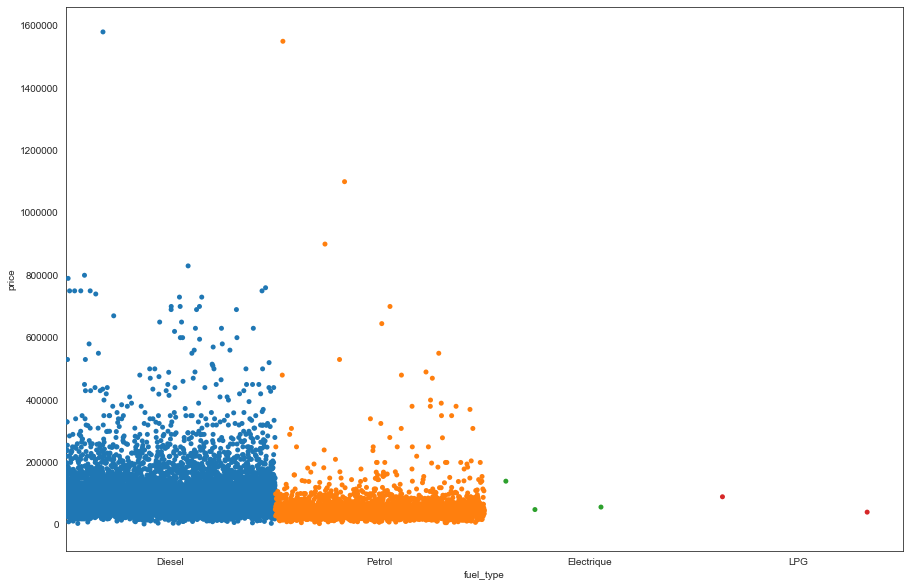

In [56]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='fuel_type', y='price', jitter=.5)
plt.show()

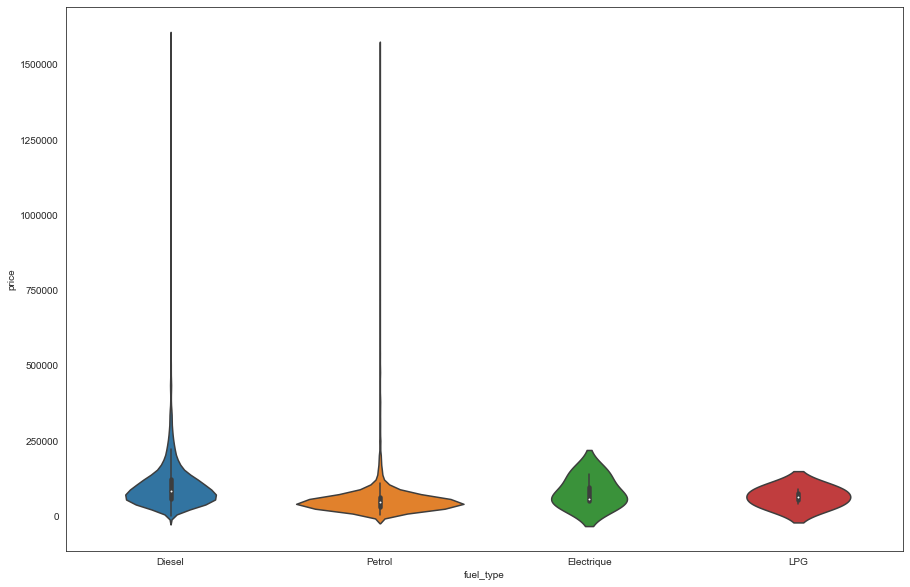

In [57]:
f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data = df, x='fuel_type', y='price')
plt.show()

In [58]:
data = df[df.price < 400000]

In [59]:
data.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,city
0,135000,2013,164999.5,Diesel,Peugeot,508,2.630656,Temara
1,53000,2008,37499.5,Diesel,Renault,Clio,2.630656,Safi
2,59000,2007,184999.5,Diesel,Citroen,C3,6.000000,Fès
3,88000,2010,37499.5,Diesel,Mercedes-Benz,220,2.630656,Nador
4,60000,2009,134999.5,Petrol,Ford,Fiesta,7.000000,Fès


In [60]:
print(len(data))
print(len(df))

8456
8553


In [61]:
X = data[['year_model', 'mileage', 'fiscal_power', 'fuel_type', 'mark']]
Y = data.price
X = pd.get_dummies(data=X)

In [62]:
X.head()

,year_model,mileage,fiscal_power,fuel_type_Diesel,fuel_type_Electrique,fuel_type_LPG,fuel_type_Petrol,mark_Acura,mark_Alfa Romeo,mark_Audi,...,mark_Skoda,mark_Ssangyong,mark_Suzuki,mark_Toyota,mark_UFO,mark_Volkswagen,mark_Volvo,mark_Zotye,mark_lancia,mark_mini
0,2013,164999.5,2.630656,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008,37499.5,2.630656,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2007,184999.5,6.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,37499.5,2.630656,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009,134999.5,7.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

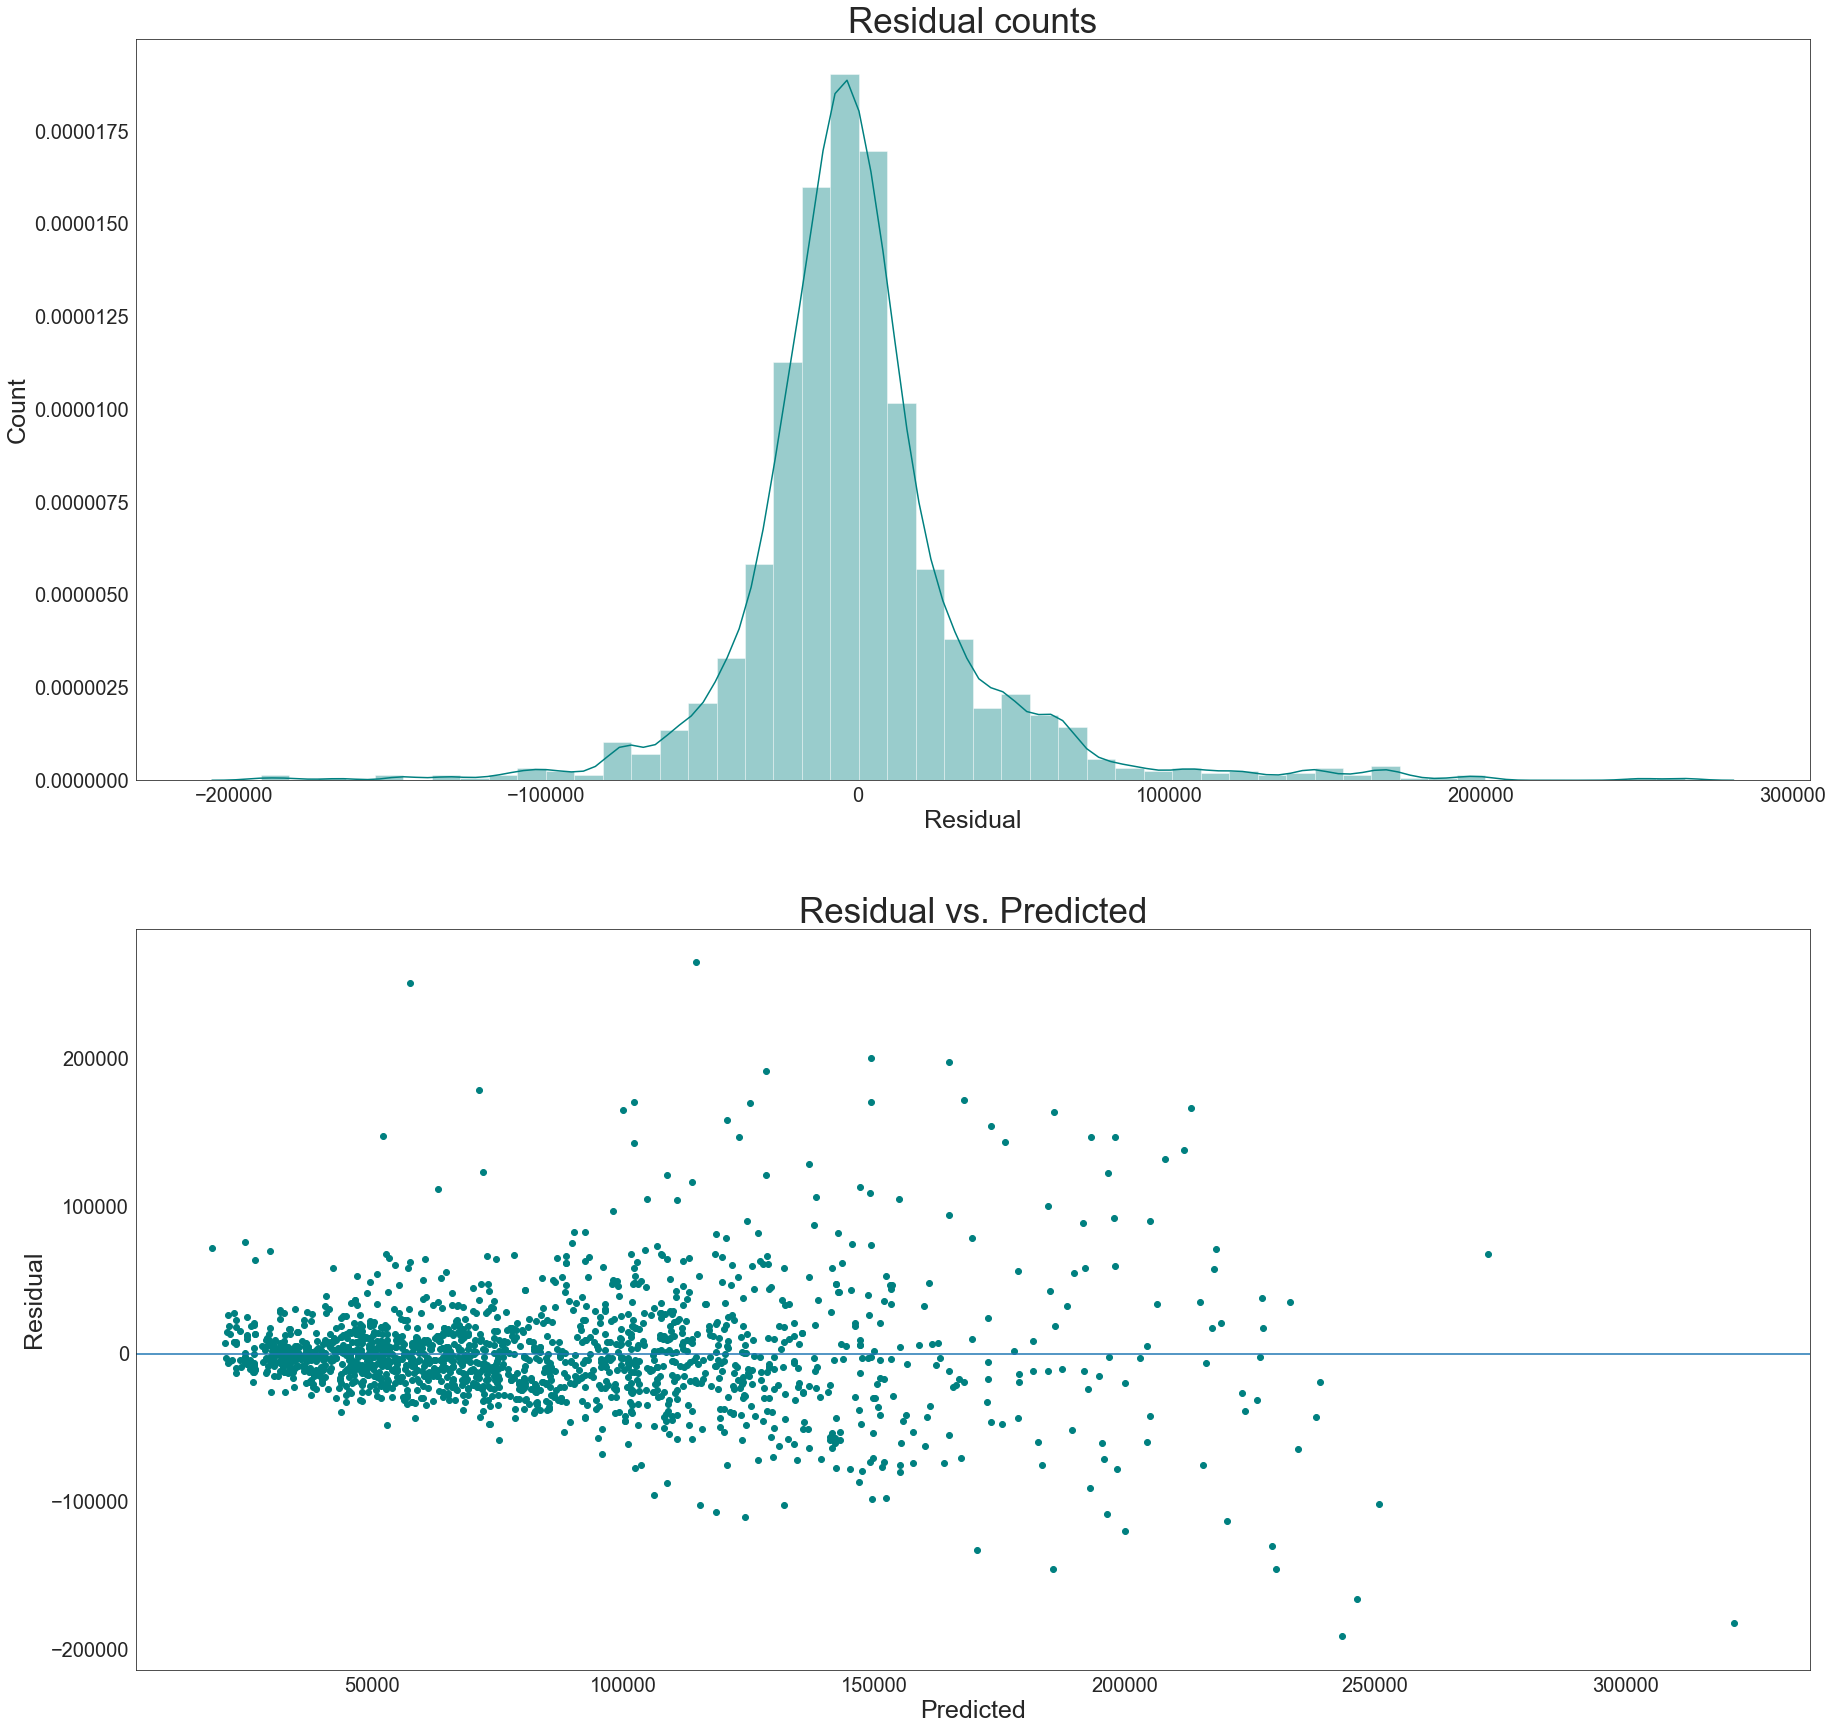

RMSE:
37709.6749493281


In [64]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [65]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.56


In [66]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

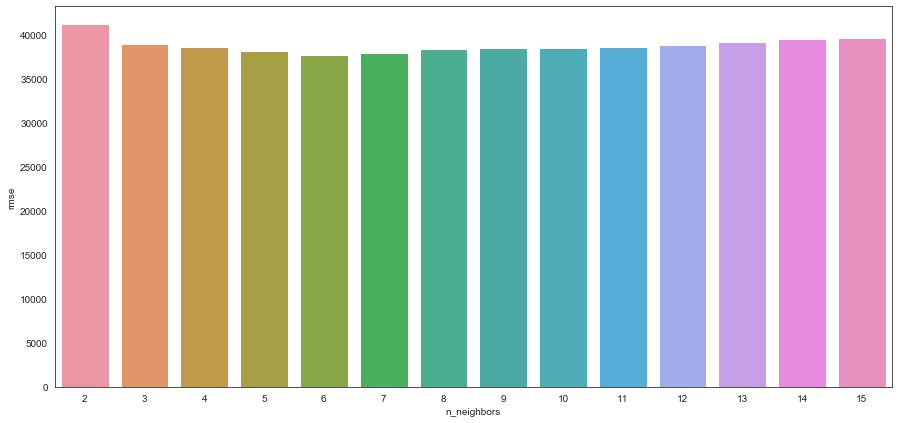

In [67]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
scores = cross_val_score(dtr, X, Y, cv=12)
print('\nMean Score:')
print(scores.mean())
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

In [79]:

user_input = {'year_model':2006, 'mileage':82499.5, 'fiscal_power':6, 'fuel_type':'Petrol', 'mark':'Dacia'}
def input_to_one_hot(data):
    enc_input = np.zeros(61)
    enc_input[0] = data['year_model']
    enc_input[1] = data['mileage']
    enc_input[2] = data['fiscal_power']
    marks = df.mark.unique()
    redefinded_user_input = 'mark_'+data['mark']
    mark_column_index = X.columns.tolist().index(redefinded_user_input)
    enc_input[mark_column_index] = 1
    fuel_types = df.fuel_type.unique()
    redefinded_user_input = 'fuel_type_'+data['fuel_type']
    fuelType_column_index = X.columns.tolist().index(redefinded_user_input)
    enc_input[fuelType_column_index] = 1
    return enc_input

In [80]:
print(input_to_one_hot(user_input))

[2.00600e+03 8.24995e+04 6.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00]


In [81]:
a = input_to_one_hot(user_input)

In [82]:
price_pred = knn.predict([a])

In [83]:
price_pred[0]

58700.0

In [84]:
from sklearn.externals import joblib

joblib.dump(knn, 'model.pkl')

['model.pkl']

In [88]:
knn1 = joblib.load('model.pkl')

In [98]:
user_input = {'year_model':2010, 'mileage':82499.5, 'fiscal_power':6, 'fuel_type':'Electrique', 'mark':'BMW'}
a = input_to_one_hot(user_input)
print("the best price for this BMW is",knn1.predict([a])[0])

the best price for this BMW is 91266.66666666667
